# US Adult Census Dataset | Salary Analysis & Prediction

In this notebook an analysis of US salaries is implemented, where the aim is to estimate if, given some features from the dataset, a salary is above or below 50'000 USD annually.

The US Adult Census dataset is a repository of records extracted from Census database in 1994, US.

The notebook includes:
- Exploration of the data to understand demographics trends.
- Models to predict if a record makes more or less than 50'000,00 $ in 1994.
- Comparison between different models and their performance.
- Relevant comments follow along the analysis.


## Preprocessing and Exploratory Data Analysis

### Data Modeling

Dataset load and Dataframe creation.

In [ ]:
# Initial imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Note: when session run out of time, you should re-load file to be read
from google.colab import files
uploaded = files.upload()


Saving adult.csv to adult.csv


### Pandas DataFrame

Building DataFrame from the dataset.

In [ ]:
# Read the CSV file as pandas dataframe
df = pd.read_csv("adult.csv")

# View the first n rows
df.head(10)

# Details of the single dataframe's columns
# for col in df:
#   print(df.get(col))
# This command to the same just done
# print(df.keys)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [ ]:
# Rows, columns
df.shape

# kind of Python obj
# print(type(df))

# Heand and tail of the DF
# print(df)

(32561, 15)

In dataset there are about 32 thousand and an half observations with 15 variables recorded each.

Variables into details:
- age: individual age [int]
- workclass: employment status [cat: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Neverworked]
- fnlwgt: final weight, kind of people represented by the dataset [int]
- education: individual highest level of education [cat: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool]
- education-num: "education" variable in numerical form [int]
- marital-status: marital status [cat: Married-civ-spouse, Married-AF-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent]
- occupation: kind of occupation [cat: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces]
- relationship: relative status to others [cat: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried]
- race: Descriptions of ethnicity [cat: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black]
- sex: biological sex [cat: Male, Female]
- capital-gain: capital gains [int]
- capital-loss: capital loss [int]
- hours-per-week: the hours an individual has reported to work per week [num]
- native-country: country of origin [cat]
- income: ones who makes more than 50'000 USD annually or not [cat: <=50k, >50k]



### Examining the Data

*Descriptive statistics* of the data.

In [ ]:
# Info about dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Overview of df, with some stat values
df.describe()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The mean age is 38,5 years old with a preatty standard 40-hour work per week.

In [ ]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Since there are no variables with high level of correlation among them, df shows statistical independence.

In [ ]:
# Count how many rows are duplicated
print(f"\nTotal number of duplicated records: {df.duplicated().sum()}")

# In case there are some repeated records they're deleted
df.drop_duplicates(inplace=True)
df.shape



Total number of duplicated records: 24


(32537, 15)

Considering the low number of duplicates compared to the dataset size, I decided to discard them since there is no much information lost.

In [ ]:
# Check out if are there missing data
print(f"\nNumber of missin data:\n{df.isna().sum()}")



Number of missin data:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


### Visualizing Features and Target
Plot to study the distribution of features and target values.

#### Count of variables

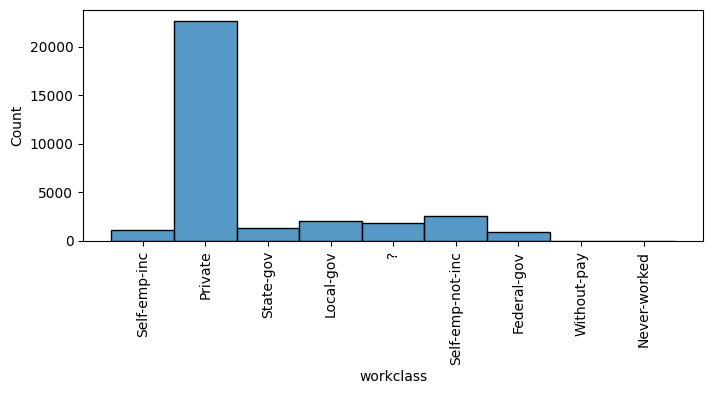

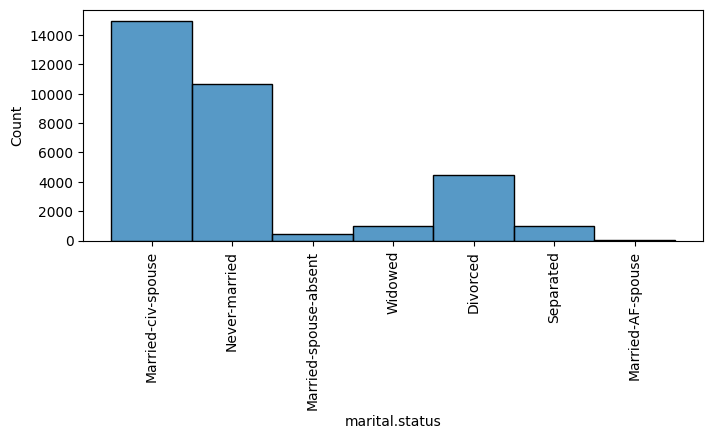

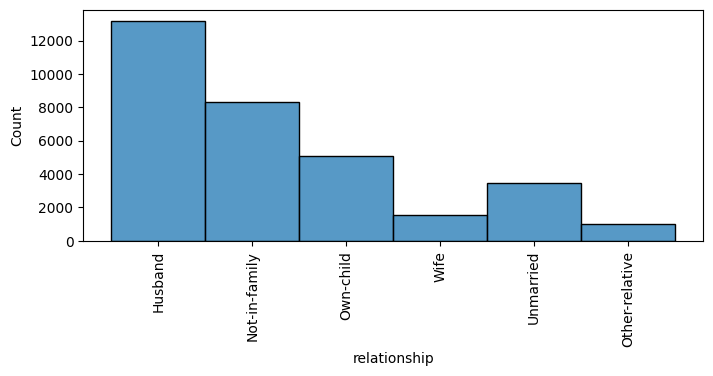

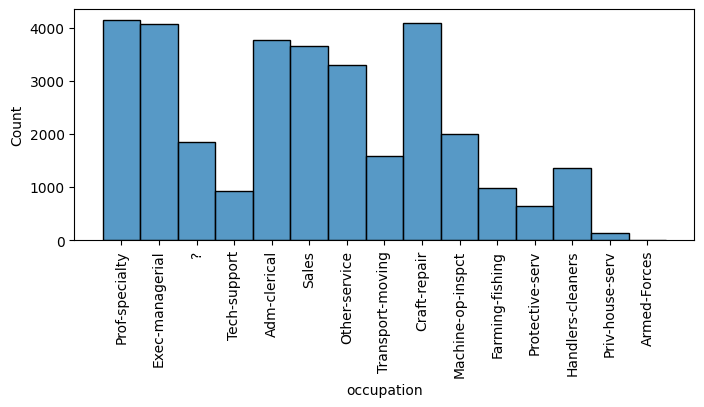

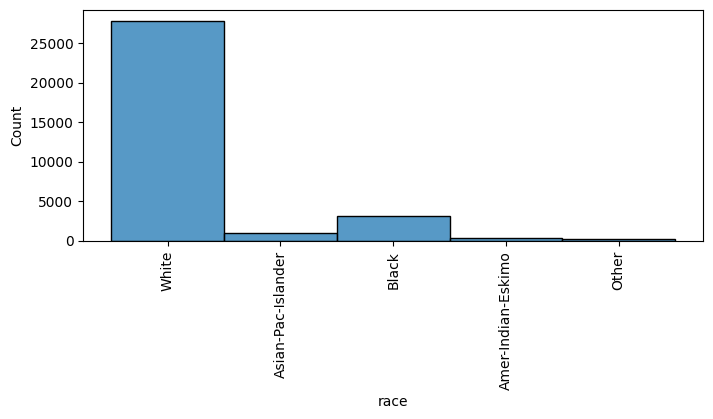

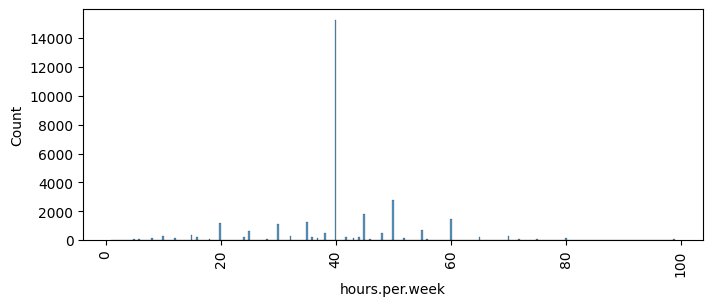

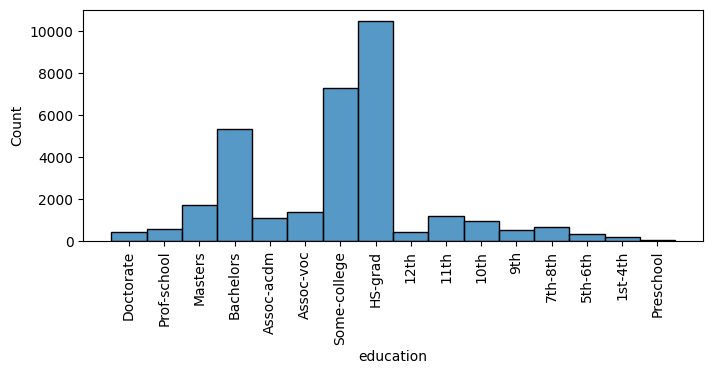

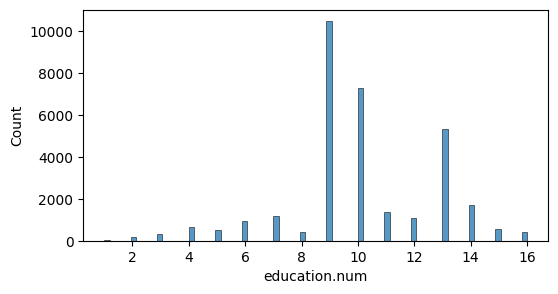

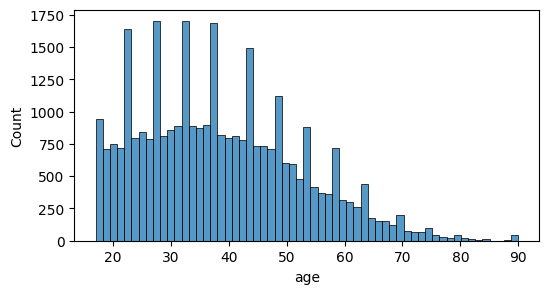

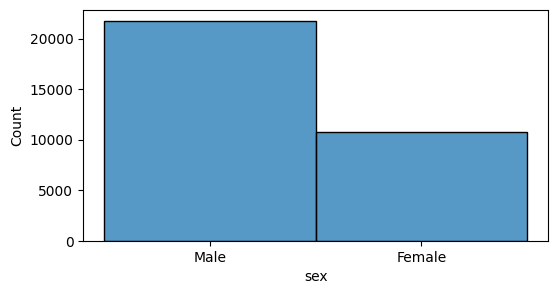

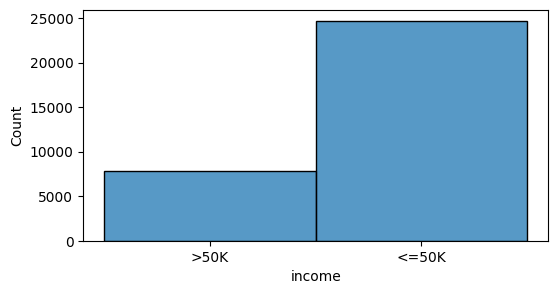

In [ ]:
# Sort the DataFrame
df = df.sort_values(by='education.num', ascending=False)

# All keys:
# age workclass	fnlwgt	education	education.num	marital.status	occupation	relationship	race	sex	capital.gain	capital.loss	hours.per.week	native.country	income

# Histplot func
small_plots = ["education.num", "age", "sex", "income"]
wide_plots = ["workclass", "marital.status", "relationship", "occupation", "race", "hours.per.week", "education"]

# Wide
for col in wide_plots:
    plt.figure(figsize=(8,3))
    sb.histplot(df[col])
    plt.xticks(rotation=90)
    plt.show()
    print("\n")

# Small
for col in small_plots:
    plt.figure(figsize=(6,3))
    sb.histplot(df[col])
    plt.xticks(rotation=0)
    plt.show()
    print("\n")


I've managed not to consider some variables which won't be used in the prediction models, for the following reasons:
- Assuming that they are not relevant, since they aren't well described, showing ambiguos information such as "capital gain" and "capital loss".
- Showing redoundant information, such as in "family status" and "relationship" or in "education" and "education.num".

Finally, observing plots, some data are very unbalanced, for example "residence of workers" is very unbalanced to USA, under "race" there is a predominance of white, or in "hours.per.week" there are mainly people working 40 h per week.

Anyway, not all of this variable will be used in predictive methods, further investigation in the sections following.

Last consideraton, in "age" plot, there is a inhomogeneous pattern where every fixed number of ages represented, there is a peak. It might be caused by the collection method applied by the census.


#### Trends

Demographics trends in respect with income.

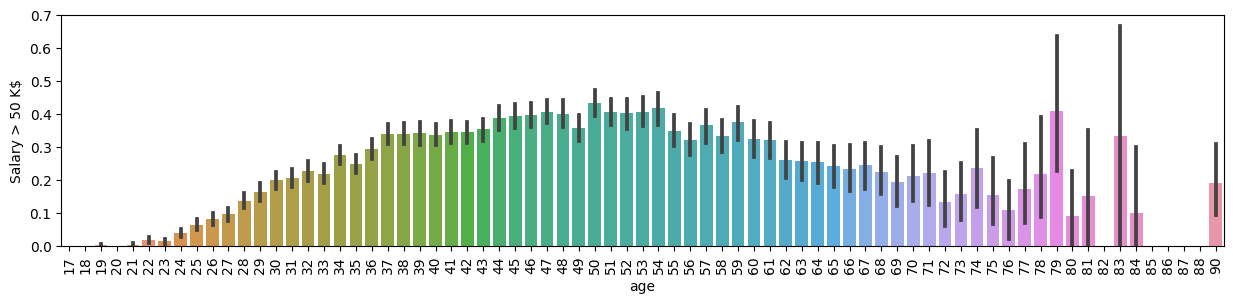

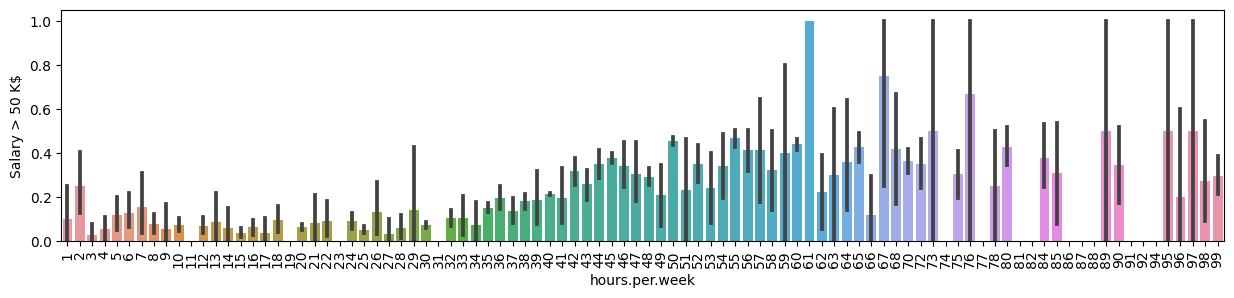

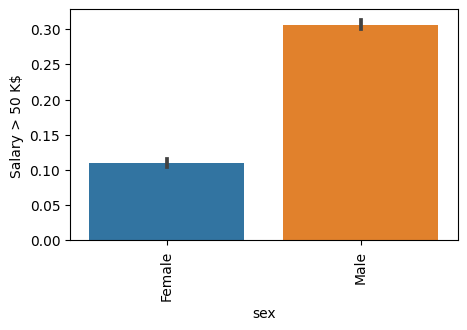

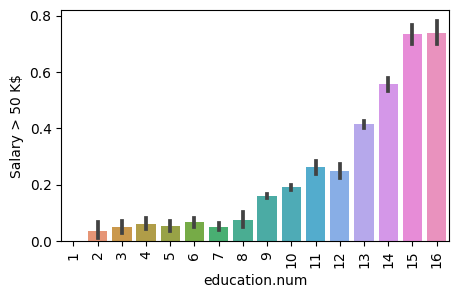

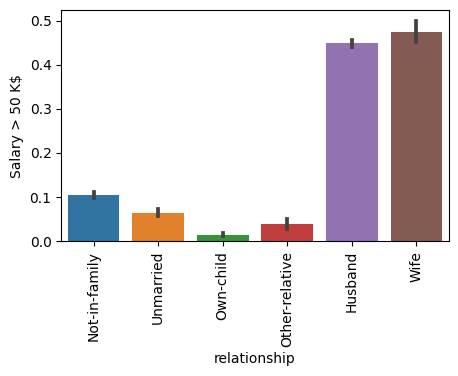

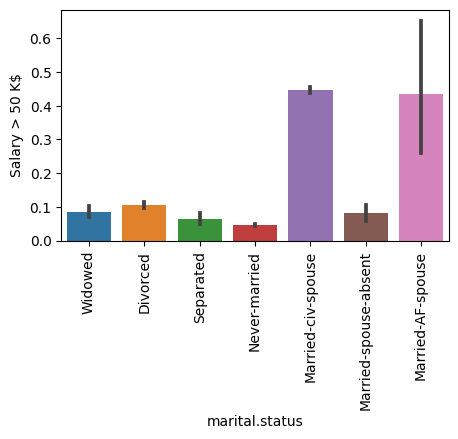

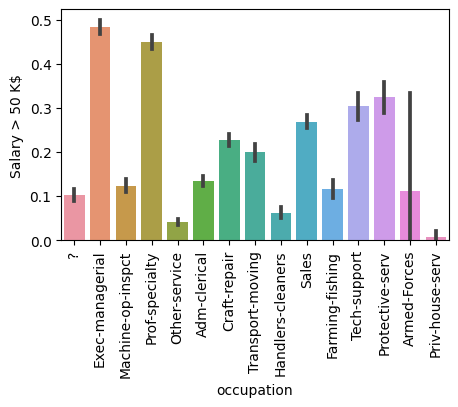

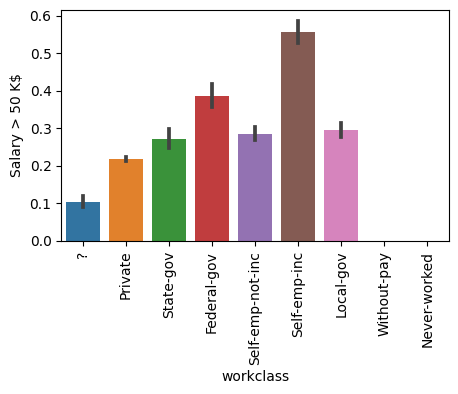

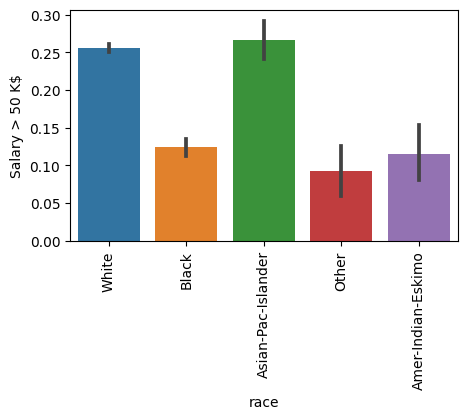

In [ ]:
# Pay attention: some times it fix as 0 = 'Salary > 50 K$' and 1 = 'Salary <= 50 K$', and some times viceversa, randomly the first time factorization is performed
df.income = pd.factorize(df.income)[0]

# Some Selected plots to see trends
tiny_plots = ["sex", "education.num", "relationship", "marital.status", "occupation", "workclass", "race",]
big_plots= ["age", "hours.per.week",]


# Wide
for col in big_plots:
    plt.figure(figsize=(15,3))
    sb.barplot(x=col, y="income", data=df)
    plt.xticks(rotation = 90)
    # plt.title('TITLE')
    plt.xlabel(col)
    plt.ylabel('Salary > 50 K$')
    plt.show()
    print("\n")

# Small
for col in tiny_plots:
    plt.figure(figsize=(5,3))
    sb.barplot(x=col, y="income", data=df)
    plt.xticks(rotation = 90)
    # plt.title('TITLE')
    plt.xlabel(col)
    plt.ylabel('Salary > 50 K$')
    plt.show()
    print("\n")


Trends considerations:

- The proportion of people earning more than 50'000 USD grow with the age, where it reaches the maximum between 50 and 55 years old, then it start to go down smoothly. The distribution reminds a Gaussian.
- There is direct proportion between number of years of education and the percentage of people erning more than 50'000 USD.
- Again, looking at the hours worked per week, it is noticeable that moving from less to more hours worked, the portion of the people having more than 50'000 USD is stable between 0 to 30 h ca., then it grows, in the range from 30 to 50 h, finally it has a sort of plateau where working more hours leads to very different result but the avarage it's quite stable.
- Considering occupation and workclass, there are some categories which have much higher percentage of superior level of salaries:
 - Executives and managerial
 - Professional specialty
 - Self employed
- The ones married are much more likely to earn more than 50'000 USD, as well as the ones with white or Asian ethnicity.
- Men are nearly 3 times more likely than women to earn more than 50'000 USD.

---
## Data Engineering

Perform the binary classification problem of predicting if a person earns more or less than 50'000 USD.

### Filter data: cleaning

In [ ]:
# Exclude peculiar cases of very high or very low of a specific value, outliers
Qinf_sal = df["hours.per.week"].quantile(0.10)
Qsup_sal = df["hours.per.week"].quantile(0.90)

print(f" range: {Qinf_sal} - {Qsup_sal}")

# 1st DataFrame filter by outliers
# df_f1 = df[(df['hours.per.week'] >= Qinf_sal) & (df['hours.per.week'] <= Qsup_sal)]
# df_f1.shape

df.shape

 range: 24.0 - 55.0


(32537, 15)

I will consider all data.

### Splitting Data

According to reasons above, in the models:

- *Target*:
 - income
- *Features*:
 - "age", "workclass", "education.num", "occupation", "relationship", "race", "sex",  "hours.per.week"

Where the following are categorical variables:
- "workclass", "occupation", "relationship", "race", "sex", "income"

Just after having transformed categorical variables, DataFrame is splitted into training and testing sets.

In [ ]:
# Dummy variables to be factorized
X =[ "workclass", "marital.status", "occupation", "relationship", "race", "sex", "native.country"]


for elem in X:

    # Factorize
    df[elem] = pd.factorize(df[elem])[0]

    # One-hot encoding
    # df = pd.concat([df, pd.get_dummies(df[elem], prefix=elem)], axis=1)
    # df.drop(elem, axis=1, inplace=True)

df.income = pd.factorize(df.income)[0]


In [ ]:
df.keys()

column_names = list(df.columns)
# print(column_names)


In [ ]:
import pydot
from IPython.display import Image
from six import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay

%matplotlib inline

In [ ]:
# age workclass	fnlwgt	education	education.num	marital.status	occupation	relationship	race	sex	capital.gain	capital.loss	hours.per.week	native.country	income
variables =["age", "workclass", "education.num", "occupation", "relationship", "race", "sex", "hours.per.week"]  # "marital.status", "native.country"


features_elements = [element for element in column_names if any(substring in element for substring in variables)]
features = df[features_elements]  # .values

target = df["income"]

# Visualization of variables
# print(f"{features}\n{target}")
# print(features.keys())
print(features.shape)


# Split data into train/test split
(Xtr, Xte, ytr, yte) = train_test_split(features, target, test_size = 0.35, random_state=23)  # train_size = 0.75,

(32537, 8)


## LogisticRegression


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)  # Ignore ConvergenceWarning


model = LogisticRegression().fit(Xtr, ytr)

pred = model.predict(Xte)


target.describe()

count    32537.000000
mean         0.240926
std          0.427652
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

Predictions




In [ ]:
# Accuracy
accuracy = accuracy_score(yte, pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(yte, pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(yte, pred)
print(f"Recall: {recall:.4f}\n")

print(classification_report(yte, pred))

Accuracy: 0.8217
Precision: 0.6884
Recall: 0.4961

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      8600
           1       0.69      0.50      0.58      2788

    accuracy                           0.82     11388
   macro avg       0.77      0.71      0.73     11388
weighted avg       0.81      0.82      0.81     11388



Logistic regression works with a performance of 0.8217 of accuracy.

By changing the proporions of train and test sets I can see that the accuracy is quite stable, it changes of about +/- 0.015.

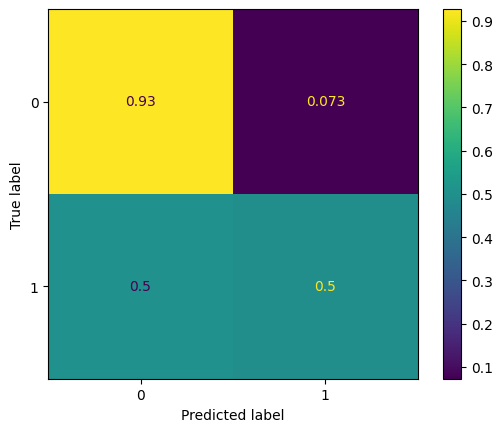

In [ ]:
cm = confusion_matrix(np.asarray(yte).astype(int), np.asarray(pred).astype(int), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

There is a tendency for income to be predicted less than 50'000 USD.

Considering the unbalanced dataset, where much more records have values < 50'000 USD as income, somehow models tend to learn to put more often labels of lower value.

*External consideration among all models:*

After conducting various models and tests, I encountered a scenario where the model predicted an accuracy of 75.9%. However, this result can be misleading because it coincides with the percentage of individuals earning less than 50'000 USD in the dataset. In this specific case, which is not displayed, the model was essentially predicting that all targets had incomes below 50'000 USD, effectively making no meaningful classification.

## CART

Proceding further with Classification Trees, first time developed by statisticians Breiman et al. (1984).

In [ ]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names


    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

### Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=30)

clf.fit(Xtr, ytr)

pred = clf.predict(Xte)

A 30 leaf nodes equipped tree looks already learning interaction between variables.

#### Showing the Tree

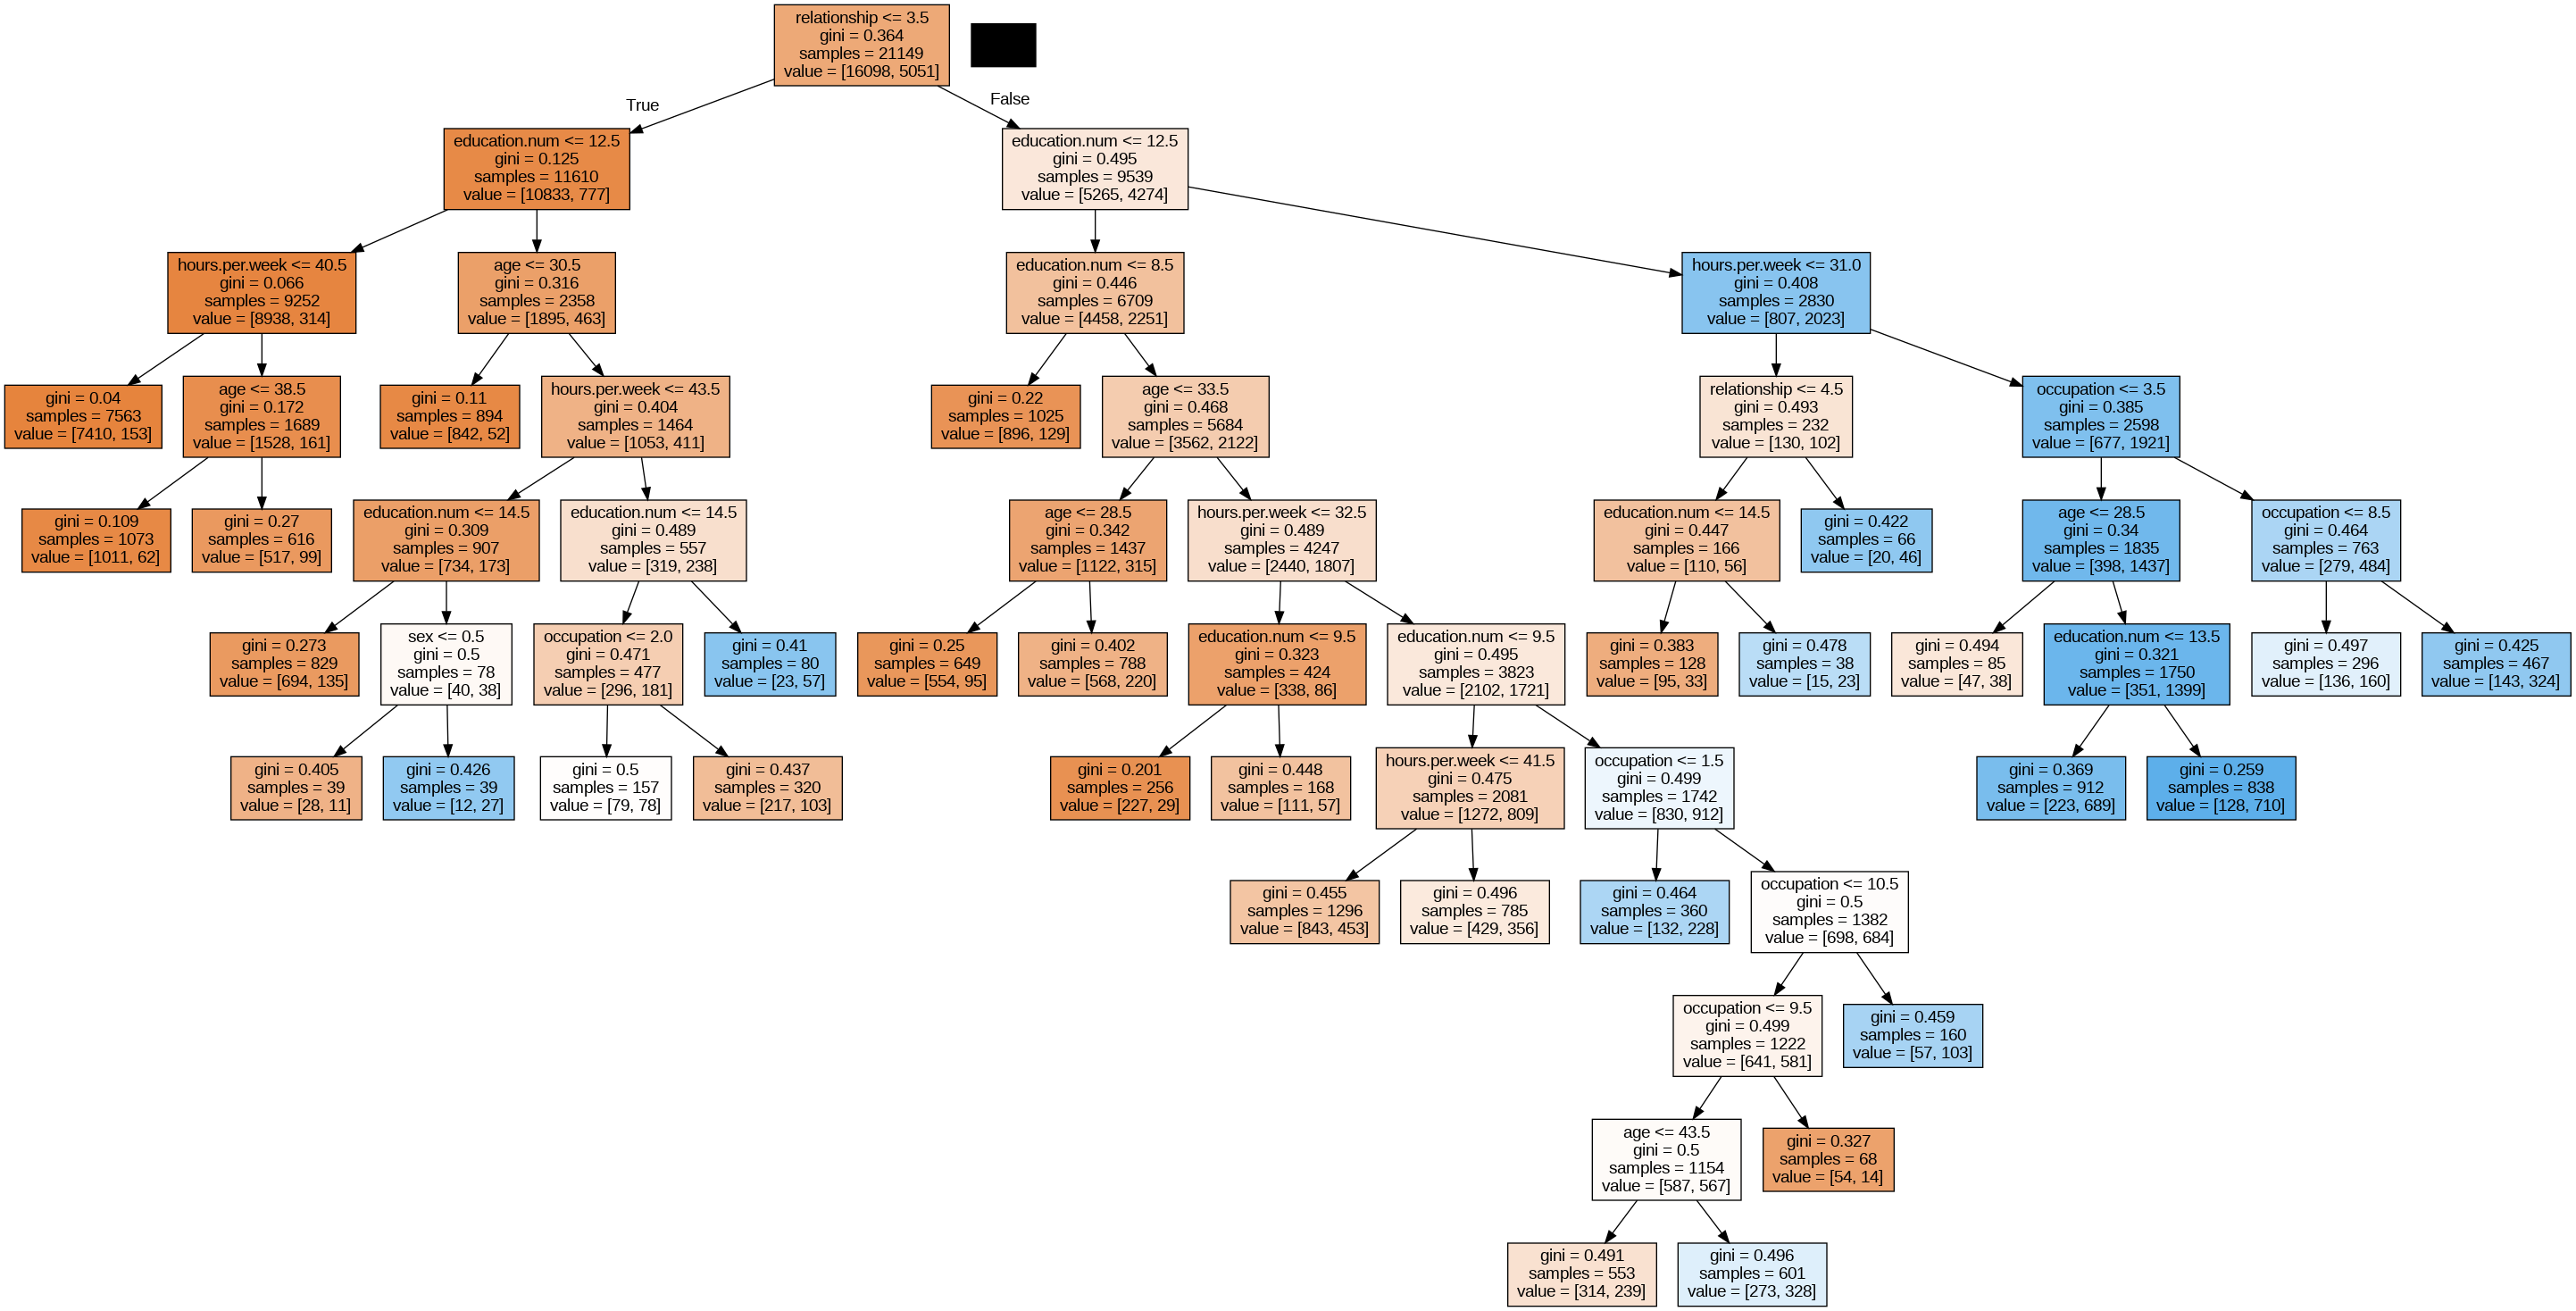

In [ ]:
graph, = print_tree(clf, features=features_elements)
Image(graph.create_png())

#### Model evaluation

In [ ]:
# Accuracy
accuracy = accuracy_score(yte, pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(yte, pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(yte, pred)
print(f"Recall: {recall:.4f}\n")

print(classification_report(yte, pred))

Accuracy: 0.8348
Precision: 0.7152
Recall: 0.5405

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      8600
           1       0.72      0.54      0.62      2788

    accuracy                           0.83     11388
   macro avg       0.79      0.74      0.76     11388
weighted avg       0.83      0.83      0.83     11388



The tree classifier reaches 0.8348 with 30 leaf nodes circa, similar to the model previously seen.

- Tree Classifier: 0.8348 accuracy
- Logistic Regression: 0.8217 accuracy


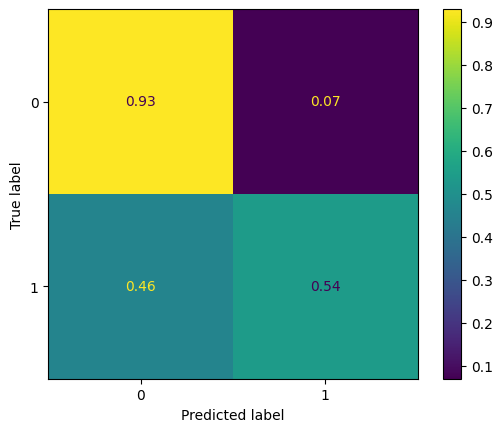

In [ ]:
cm = confusion_matrix(np.asarray(yte).astype(int), np.asarray(pred).astype(int), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

The tendency for income to be predicted less than 50'000 USD is a little relaxed in this case compared to Logistic Regression model.

### Random Forest

In [ ]:
# Bagging: RandomForestRegression using all features used in other models
clf = RandomForestClassifier(n_estimators=10, max_features=40, random_state=23)

clf.fit(Xtr, ytr)
pred = clf.predict(Xte)

In [ ]:
# Accuracy
accuracy = accuracy_score(yte, pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(yte, pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(yte, pred)
print(f"Recall: {recall:.4f}\n")

print(classification_report(yte, pred))

Accuracy: 0.8088
Precision: 0.6305
Recall: 0.5294

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      8600
           1       0.63      0.53      0.58      2788

    accuracy                           0.81     11388
   macro avg       0.74      0.71      0.73     11388
weighted avg       0.80      0.81      0.80     11388



In [ ]:
# Random forests: using less features
clf = RandomForestClassifier(n_estimators=10, max_features=5, random_state=23)
clf.fit(Xtr, ytr)
pred = clf.predict(Xte)

In [ ]:
# Accuracy
accuracy = accuracy_score(yte, pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(yte, pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(yte, pred)
print(f"Recall: {recall:.4f}\n")

print(classification_report(yte, pred))

Accuracy: 0.8135
Precision: 0.6410
Recall: 0.5412

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      8600
           1       0.64      0.54      0.59      2788

    accuracy                           0.81     11388
   macro avg       0.75      0.72      0.73     11388
weighted avg       0.81      0.81      0.81     11388



Using less features leads to a little improvement in RF.

Anyway, it perfomes a little worse than Decision Tree, this could be caused by some reasons, e.g. in some cases, a single deep Decision Tree might capture some specific patterns in the data that the ensemble of trees in a Random Forest misses.

- Random Forest: 0.8135 accuracy
- Tree Classifier: 0.8348 accuracy
- Logistic Regression: 0.8217 accuracy

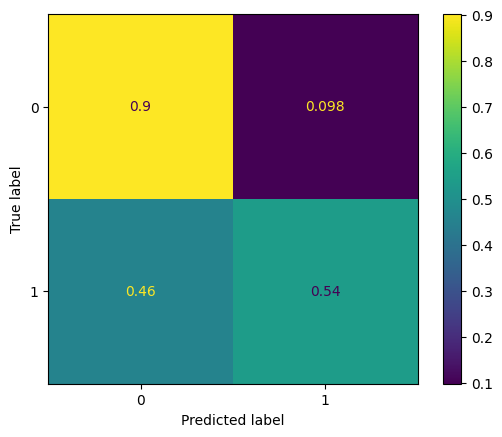

In [ ]:
cm = confusion_matrix(np.asarray(yte).astype(int), np.asarray(pred).astype(int), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Outcomes are more homogeneously distributed.

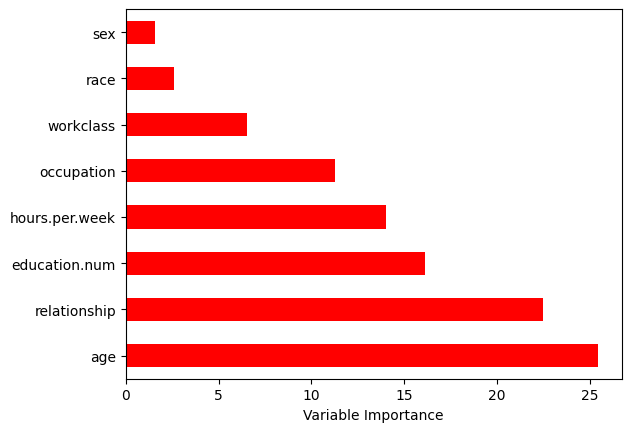

Top Most Important Features:
                Importance
age              25.433020
relationship     22.462790
education.num    16.133817
hours.per.week   13.996083
occupation       11.261334
workclass         6.527624
race              2.602318
sex               1.583014


In [ ]:
Importance = pd.DataFrame({'Importance': clf.feature_importances_ * 100}, index=features_elements)
sorted_importance = Importance.sort_values('Importance', axis=0, ascending=False)

# Plot the top most important features
top_importance = sorted_importance.head(20)
top_importance.plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.show()

# Print the top most important features
print("Top Most Important Features:")
print(top_importance)


Most relevant features in case of Random Forest model are:
- age: accounting for 25.4%
- relationship: 22.5%
- education: 16.1%
- hours per week: 14.0%



### Gradient Boosting

In [ ]:
# n_estimators = number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=23)

clf.fit(Xtr, ytr)

pred = clf.predict(Xte)

In [ ]:
# Accuracy
accuracy = accuracy_score(yte, pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(yte, pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(yte, pred)
print(f"Recall: {recall:.4f}\n")

print(classification_report(yte, pred))

Accuracy: 0.8382
Precision: 0.7331
Recall: 0.5330

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8600
           1       0.73      0.53      0.62      2788

    accuracy                           0.84     11388
   macro avg       0.80      0.74      0.76     11388
weighted avg       0.83      0.84      0.83     11388



Gradient Boosting performs similarly to other models, in particular it appears to be the best method:

- Gradient Boosting: 0.8382 accuracy
- Random Forest: 0.8135 accuracy
- Tree Classifier: 0.8348 accuracy
- Logistic Regression: 0.8217 accuracy

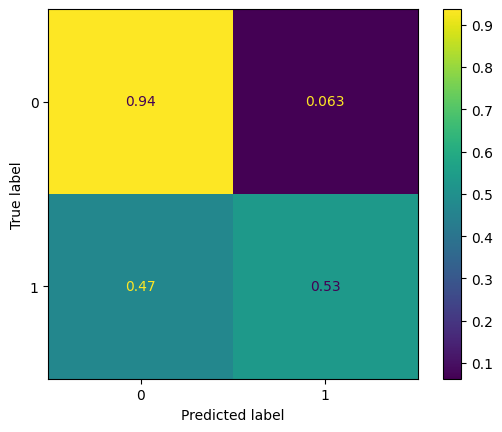

In [ ]:
cm = confusion_matrix(np.asarray(yte).astype(int), np.asarray(pred).astype(int), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

With Gradient Boosting True Positives are better than in Logistic Regression (0.93).

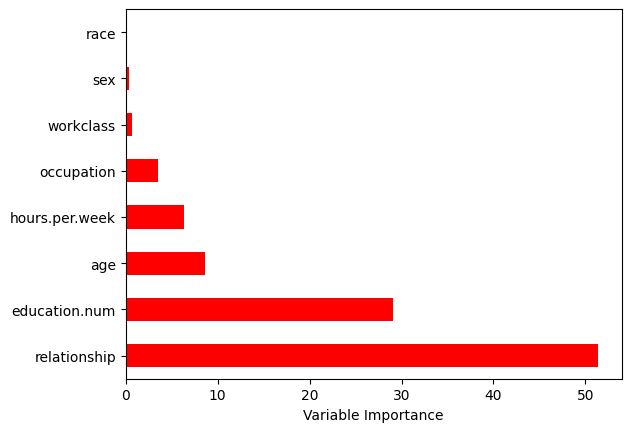

Top Most Important Features:
                Importance
relationship     51.384709
education.num    29.051964
age               8.615908
hours.per.week    6.370159
occupation        3.541445
workclass         0.637874
sex               0.377875
race              0.020066


In [ ]:
Importance = pd.DataFrame({'Importance': clf.feature_importances_ * 100}, index=features_elements)
sorted_importance = Importance.sort_values('Importance', axis=0, ascending=False)

# Plot the top most important features
top_importance = sorted_importance.head(20)
top_importance.plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.show()

# Print the top most important features
print("Top Most Important Features:")
print(top_importance)


Most relevant features in case of Gradient Boosting are similar to the ones found in the Random Forest model, with substancial difference, since in this case, the most important feature is:
- relationship: 51,4%

Then come:
- education
- age, the most important feature in random forest
- hours per week

In both Random Forest and Gradient Boosting there are some low importance variables: sex and race.

---

Final remarks about models performance:
- Gradient Boosting: 0.8382 accuracy
- Random Forest: 0.8135 accuracy
- Tree Classifier: 0.8348 accuracy
- Logistic Regression: 0.8217 accuracy

In this salary analysis most important features are:
- education: higher level of education leads to higher salary, for example ones having PhDs or Masters.
- age: there is relationship between salary and income, considering also that work-experience usually grows with age.
- relationship status: the analysis shows that being married leads to better income
- hours per week worked: the more one works, the more a person earns.
- kind of job: executives, managers, specialists, federal governors are jobs where salary are significantly higher.
- self employed: people who are self employd have usually higher income

Even thought I would expect to find CART methods more effective in classification problems compared to Logistic Regression, I observed similar performance between the two.
Anyway, logistic regression also well fits in binary classification problems, where the goal is to divide records into two categories, as demonstrated in this analysis.

Further investingation I would suggest:
- Trying out to balance the dataset so that the ones earning more than 50'000 USD are in similar count of the ones who don't, then carry out again the pipeline to see how models performe in this case.
- Trying out to discard less important features (sex and race) from the model and see if it possible to obtain similar or better performarce.